<h2>Nonnegative Matrix Factorization</h2>
<p>This is work with 8447 documents from The New York Times and the vocabulary with 3012 words.</p>

In [84]:
import pandas as pd
import numpy as np
PATH =
f = open(PATH+"/nyt_data.txt")

doc_list= dict()
n = 0
for i in f:
    n+=1
    doc_list[n] = [] ##start from 1 
    for each in i.split(","):
        k,v = int(each.split(":")[0]),int(each.split(":")[1])  
        doc_list[n].append((k,v))
print(n)
f = open(PATH+"/nyt_vocab.dat")
vocab = []
n=0
for i in f:
    n+=1  
    vocab.append((n,i.replace("\n","")))

8447


In [85]:
n_voc = 3012
n_doc = 8447
d = 25

#construct matrix
X = np.empty((n_voc,n_doc))
for j,value in doc_list.items():  #j start from 1 to 8447
    for (i,v) in value: #i 
        X[i-1,j-1]= v

In [87]:
def divergence_objective(x,w,h):
    return -np.sum(np.multiply(np.log((np.dot(w,h)+1e-16)),x) - np.dot(w,h)) #add 1e-16 to avoid /0

def normal(m,axis):
    result = m
    if axis == 1:
        for i in range(len(m)):
            m[i] /= m[i].sum()
        return m
    elif axis == 0:
        n = m.T
        for i in range(len(n)):
            n[i] /= n[i].sum()
        return n.T
    else: raise ValueError

In [107]:
W = np.random.uniform(1,2,(n_voc,d))
H = np.random.uniform(1,2,(d,n_doc))

objective = []
for t in range(100):
    P = X/(np.dot(W,H)+1e-16)
    H = np.multiply(H, W.T.dot(P))/np.sum(W,axis=0).reshape(d,1)
    #renew P
    P = X/(np.dot(W,H)+1e-16)
    W = np.multiply(W,P.dot(H.T))/np.sum(H,axis=1).reshape(1,d)
    
    #print(divergence_objective(X,W,H))
    objective.append(divergence_objective(X,W,H)) 
    

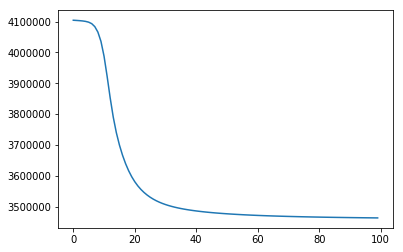

In [108]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(objective)

In [134]:
def top_words(w,n=10): #w:nparray
    wl = w.tolist()
    result_list = []
    for i in range(len(wl)):
        wl[i] = (i+1,wl[i])
    top = sorted(wl,key=lambda x:x[1],reverse=True)[:n]
    for k,v in dict(top).items():
        result_list.append((dict(vocab)[k],round(v,6)))
    return result_list

In [124]:
vocab

[(1, 'company'),
 (2, 'percent'),
 (3, 'state'),
 (4, 'play'),
 (5, 'official'),
 (6, 'game'),
 (7, 'man'),
 (8, 'city'),
 (9, 'plan'),
 (10, 'school'),
 (11, 'group'),
 (12, 'states'),
 (13, 'american'),
 (14, 'program'),
 (15, 'point'),
 (16, 'government'),
 (17, 'home'),
 (18, 'case'),
 (19, 'tell'),
 (20, 'woman'),
 (21, 'child'),
 (22, 'life'),
 (23, 'report'),
 (24, 'place'),
 (25, 'country'),
 (26, 'second'),
 (27, 'start'),
 (28, 'issue'),
 (29, 'team'),
 (30, 'large'),
 (31, 'public'),
 (32, 'thing'),
 (33, 'member'),
 (34, 'president'),
 (35, 'market'),
 (36, 'yesterday'),
 (37, 'business'),
 (38, 'move'),
 (39, 'change'),
 (40, 'pay'),
 (41, 'win'),
 (42, 'add'),
 (43, 'ask'),
 (44, 'old'),
 (45, 'family'),
 (46, 'world'),
 (47, 'big'),
 (48, 'price'),
 (49, 'law'),
 (50, 'money'),
 (51, 'put'),
 (52, 'turn'),
 (53, 'open'),
 (54, 'season'),
 (55, 'name'),
 (56, 'director'),
 (57, 'offer'),
 (58, 'ago'),
 (59, 'student'),
 (60, 'problem'),
 (61, 'talk'),
 (62, 'keep'),
 (63,

In [135]:
W = W/np.sum(W,axis=0)
nn=0
result_df = pd.DataFrame(columns=list(range(0,len(W.T))))
for col in W.T:
    result_df[nn] =  top_words(col,n=10)
    nn+=1

In [137]:
result_df.to_csv(PATH+"result.csv")

In [130]:
result_df #top 10 words with 25 trained topics

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"(thing, 0.015503)","(water, 0.013561)","(bank, 0.019327)","(charge, 0.025796)","(team, 0.028321)","(film, 0.015516)","(father, 0.04904)","(school, 0.034662)","(food, 0.01766)","(company, 0.046233)",...,"(vote, 0.020257)","(computer, 0.017756)","(pay, 0.013808)","(percent, 0.041293)","(book, 0.015342)","(drug, 0.012554)","(government, 0.016516)","(official, 0.015985)","(law, 0.028228)","(win, 0.025266)"
1,"(ask, 0.013154)","(mile, 0.01322)","(market, 0.017536)","(case, 0.018561)","(game, 0.027212)","(play, 0.014742)","(son, 0.040894)","(student, 0.026745)","(restaurant, 0.010341)","(executive, 0.018645)",...,"(campaign, 0.019006)","(technology, 0.011808)","(city, 0.01367)","(rise, 0.020847)","(editor, 0.013953)","(health, 0.011967)","(military, 0.016332)","(meeting, 0.012925)","(rule, 0.019924)","(second, 0.022403)"
2,"(tell, 0.012631)","(area, 0.010254)","(trade, 0.016896)","(investigation, 0.01524)","(player, 0.021827)","(movie, 0.013114)","(mrs, 0.038508)","(education, 0.013657)","(serve, 0.009708)","(business, 0.017698)",...,"(political, 0.016719)","(network, 0.011637)","(money, 0.012913)","(rate, 0.019354)","(write, 0.013717)","(study, 0.011694)","(states, 0.014884)","(plan, 0.00954)","(court, 0.018603)","(score, 0.015242)"
3,"(feel, 0.01116)","(plant, 0.009964)","(economy, 0.015582)","(lawyer, 0.014648)","(season, 0.021339)","(character, 0.013042)","(mother, 0.035396)","(class, 0.012835)","(taste, 0.009061)","(sell, 0.016799)",...,"(republican, 0.014338)","(system, 0.011293)","(plan, 0.012758)","(increase, 0.017518)","(life, 0.008596)","(doctor, 0.010865)","(american, 0.014785)","(member, 0.009185)","(state, 0.016074)","(victory, 0.015154)"
4,"(lot, 0.010608)","(build, 0.009595)","(economic, 0.014135)","(trial, 0.014073)","(play, 0.0195)","(love, 0.011759)","(daughter, 0.029929)","(child, 0.012356)","(fresh, 0.008681)","(sale, 0.015205)",...,"(election, 0.013982)","(television, 0.011011)","(cost, 0.012532)","(price, 0.014361)","(article, 0.008371)","(problem, 0.009489)","(war, 0.014677)","(issue, 0.008562)","(case, 0.015442)","(third, 0.014402)"
5,"(live, 0.009591)","(foot, 0.009004)","(dollar, 0.013411)","(prison, 0.011342)","(coach, 0.013243)","(story, 0.011118)","(family, 0.028392)","(college, 0.011997)","(eat, 0.008046)","(president, 0.014007)",...,"(candidate, 0.013488)","(company, 0.010491)","(state, 0.012088)","(low, 0.013943)","(writer, 0.007968)","(medical, 0.009231)","(force, 0.011655)","(meet, 0.008527)","(legal, 0.013232)","(point, 0.013634)"
6,"(really, 0.009249)","(site, 0.0071)","(states, 0.012465)","(prosecutor, 0.010754)","(league, 0.009421)","(man, 0.011069)","(graduate, 0.025364)","(program, 0.010869)","(pound, 0.00778)","(share, 0.013808)",...,"(party, 0.012971)","(program, 0.009668)","(program, 0.010676)","(average, 0.013719)","(world, 0.007106)","(patient, 0.009209)","(country, 0.011063)","(deal, 0.008339)","(judge, 0.011912)","(play, 0.013371)"
7,"(little, 0.008571)","(north, 0.006894)","(country, 0.011644)","(evidence, 0.009908)","(baseball, 0.009319)","(woman, 0.010601)","(marry, 0.020991)","(teacher, 0.00998)","(fish, 0.007212)","(chief, 0.012271)",...,"(democratic, 0.011381)","(information, 0.008834)","(project, 0.009888)","(report, 0.01302)","(author, 0.006657)","(cause, 0.009046)","(leader, 0.00975)","(statement, 0.00787)","(lawyer, 0.011426)","(final, 0.012394)"
8,"(keep, 0.008076)","(land, 0.006847)","(government, 0.011438)","(criminal, 0.009901)","(ball, 0.007073)","(life, 0.010331)","(receive, 0.018515)","(parent, 0.008721)","(cook, 0.007167)","(buy, 0.012)",...,"(leader, 0.01107)","(site, 0.008491)","(tax, 0.009566)","(fall, 0.011922)","(read, 0.006371)","(test, 0.00839)","(official, 0.008981)","(ask, 0.007714)","(decision, 0.010934)","(lose, 0.010989)"
9,"(put, 0.007458)","(city, 0.006364)","(interest, 0.011117)","(crime, 0.008616)","(football, 0.006969)","(young, 0.009961)","(retire, 0.017127)","(group, 0.008421)","(add, 0.007048